<a href="https://colab.research.google.com/github/TumSim/python_data_analytics1/blob/main/Python_Selittava_analytiikka_Tehtava2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
sns.set_style("whitegrid")

# **Kaupunkien eri tunnusluvut**

In [3]:
df = pd.read_excel("kunnat.xlsx")
df

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [4]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
"Taajama-aste, %, 2020",1.000000,0.402412,0.306102,0.319067,0.535689,-0.506366,-0.234723,-0.084906,0.093403,0.010949,...,0.335879,-0.723077,0.333258,0.272870,0.255694,0.033925,0.134794,0.321343,0.058898,-0.233368
"Väkiluku, 2021",0.402412,1.000000,0.221529,0.054646,0.497108,-0.336465,-0.062596,0.254370,0.655554,-0.466797,...,0.986236,-0.341254,-0.081905,0.348667,0.253926,0.057725,0.021147,0.228539,0.078696,-0.183148
"Väkiluvun muutos edellisestä vuodesta, %, 2021",0.306102,0.221529,1.000000,0.418843,0.558848,-0.575498,0.251831,0.308831,0.243422,0.197336,...,0.177352,-0.391044,0.040833,0.229888,-0.188339,-0.045871,-0.035141,-0.099145,0.268085,-0.555486
"Alle 15-vuotiaiden osuus väestöstä, %, 2021",0.319067,0.054646,0.418843,1.000000,0.465038,-0.837798,0.120809,0.025660,0.233647,0.035029,...,0.028110,-0.232717,0.256938,-0.070350,-0.295083,-0.056971,0.170169,0.071536,0.507006,-0.618757
"15-64 -vuotiaiden osuus väestöstä, %, 2021",0.535689,0.497108,0.558848,0.465038,1.000000,-0.872926,0.135523,0.300062,0.325021,0.020040,...,0.434230,-0.592930,0.099562,0.337072,-0.079918,-0.042930,0.042858,0.037452,0.390331,-0.695884
"Yli 64-vuotiaiden osuus väestöstä, %, 2021",-0.506366,-0.336465,-0.575498,-0.837798,-0.872926,1.000000,-0.150371,-0.199146,-0.328900,-0.031305,...,-0.283085,0.494216,-0.203172,-0.169179,0.211678,0.057364,-0.120237,-0.062643,-0.520535,0.770051
"Ruotsinkielisten osuus väestöstä, %, 2021",-0.234723,-0.062596,0.251831,0.120809,0.135523,-0.150371,1.000000,0.678607,0.057643,-0.007052,...,-0.046860,0.000742,-0.075861,0.004786,-0.163677,-0.139301,-0.053351,-0.298829,0.351697,-0.442825
"Ulkomaan kansalaisten osuus väestöstä, %, 2021",-0.084906,0.254370,0.308831,0.025660,0.300062,-0.199146,0.678607,1.000000,0.262611,-0.136453,...,0.244714,-0.089102,-0.121664,0.127122,0.019956,-0.111483,-0.112208,-0.206034,0.211812,-0.445119
"Syntyneiden enemmyys, henkilöä, 2021",0.093403,0.655554,0.243422,0.233647,0.325021,-0.328900,0.057643,0.262611,1.000000,-0.381413,...,0.650602,-0.074947,-0.078440,0.124676,-0.056998,0.051663,-0.011776,0.089360,0.201753,-0.232552
"Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",0.010949,-0.466797,0.197336,0.035029,0.020040,-0.031305,-0.007052,-0.136453,-0.381413,1.000000,...,-0.558853,-0.031955,0.020021,0.001399,-0.142589,-0.075345,0.033328,-0.054632,-0.011879,-0.045807


**Tarkastellaan Sote kulujen korrelaatiota muihin**

In [5]:
df.corr()['Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020']

<ipython-input-5-75f59ce0071f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020']


Taajama-aste, %, 2020                                                                    -0.233368
Väkiluku, 2021                                                                           -0.183148
Väkiluvun muutos edellisestä vuodesta, %, 2021                                           -0.555486
Alle 15-vuotiaiden osuus väestöstä, %, 2021                                              -0.618757
15-64 -vuotiaiden osuus väestöstä, %, 2021                                               -0.695884
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                                0.770051
Ruotsinkielisten osuus väestöstä, %, 2021                                                -0.442825
Ulkomaan kansalaisten osuus väestöstä, %, 2021                                           -0.445119
Syntyneiden enemmyys, henkilöä, 2021                                                     -0.232552
Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021                                     -0.045807
Perheiden 

Text(0.5, 36.72222222222221, 'Sosiaali- ja terveystoiminta\nnettoku/kustannukset, €/asukas, 2020')

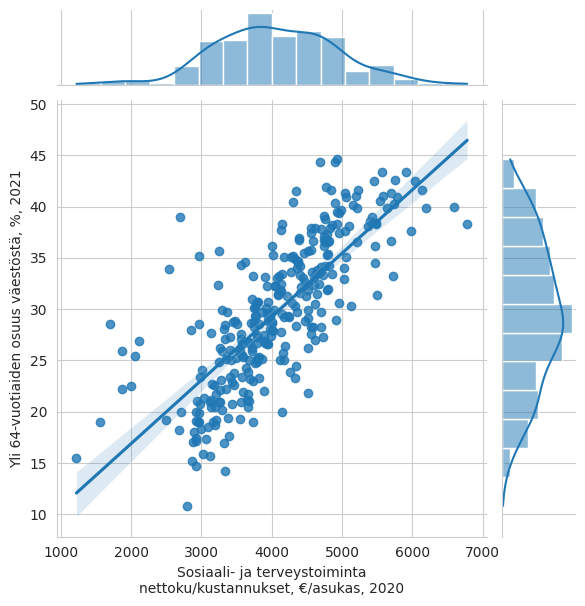

In [6]:
t = sns.jointplot(data = df, x = "Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020", y = "Yli 64-vuotiaiden osuus väestöstä, %, 2021", kind = "reg")
t.ax_joint.set_xlabel("Sosiaali- ja terveystoiminta\nnettoku/kustannukset, €/asukas, 2020", fontsize=10)

**Visuaalisesti tarkemmassa tarkastelussa Sote kulut ja Yli 64-vuotiaiden osuus väestöstä, %, 2021.**

Text(0.5, 36.72222222222221, 'Sosiaali- ja terveystoiminta\nnettoku/kustannukset, €/asukas, 2020')

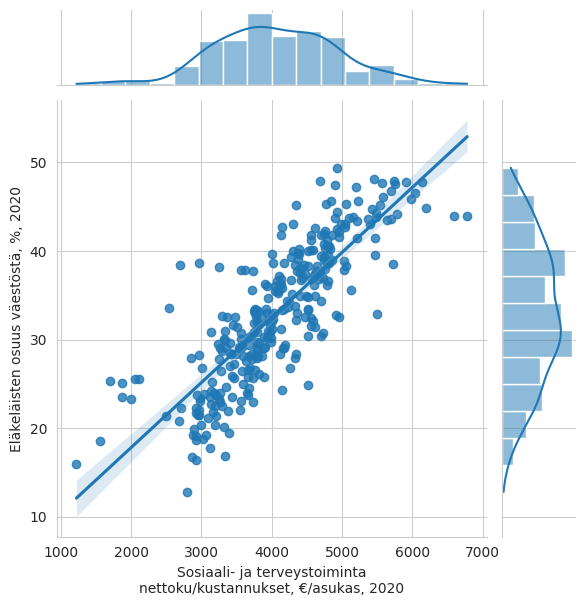

In [7]:
t = sns.jointplot(data = df, x = "Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020", y = "Eläkeläisten osuus väestöstä, %, 2020", kind = "reg")
t.ax_joint.set_xlabel("Sosiaali- ja terveystoiminta\nnettoku/kustannukset, €/asukas, 2020", fontsize=10)

**Visuaalisesti tarkemmassa tarkastelussa Sote kulut ja Eläkeläisten osuus väestöstä, %, 2020**

Pudotetaan kaupungit pois, jotta pystytään laskemaan kertoimet

In [8]:
df1 = df.drop(df.columns[0], axis=1)
df1

,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021","Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,64,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,-93,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,-27,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,-68,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,27,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,2,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,20,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,-13,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,-1,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


In [9]:
for muuttuja in df1:
    df1_dropna = df1.dropna(subset=[muuttuja, 'Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020'])
    r, p = pearsonr(df1_dropna['Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020'], df1_dropna[muuttuja])
    print(f'{muuttuja:<90} r = {r:>6.3f}, p = {p:.3f}')

Taajama-aste, %, 2020                                                                      r = -0.233, p = 0.000
Väkiluku, 2021                                                                             r = -0.183, p = 0.001
Väkiluvun muutos edellisestä vuodesta, %, 2021                                             r = -0.555, p = 0.000
Alle 15-vuotiaiden osuus väestöstä, %, 2021                                                r = -0.619, p = 0.000
15-64 -vuotiaiden osuus väestöstä, %, 2021                                                 r = -0.696, p = 0.000
Yli 64-vuotiaiden osuus väestöstä, %, 2021                                                 r =  0.770, p = 0.000
Ruotsinkielisten osuus väestöstä, %, 2021                                                  r = -0.443, p = 0.000
Ulkomaan kansalaisten osuus väestöstä, %, 2021                                             r = -0.445, p = 0.000
Syntyneiden enemmyys, henkilöä, 2021                                                       r = -

Luonnollisia huomioita on eläkeläisten osuus- ja yli 64-vuotiaiden osuus väestöstä, kun katsotaan riippuvuutta Sote kuluihin. Vanhemmat ihmiset lisäävät kyseisten palveluiden käyttöä, joka onkin odotettavissa.

Mielenkiintoisena pidän Väkiluvun riippuvuutta, joka yllättävän pieni. Voisi ajatella väkiluvullisesti suurempien kaupunkien korreloivan herkemmin Sote-kuluihin. Tilanne voi tarkoittaa hyvää, että kaupungeissa sijoitetaan ihmisiin saman verran, oli kyseessä pieni tai suuri kaupunki.

**Korrelaation merkitsevyys**


Muiden paitsi alla lueteltujen osioiden kanssa on merkitsevä korrelaatio Sote kulujen kanssa. Tämän voi nähdä korrelaatiokertoimen p-arvosta. Mikäli p-arvo > 0.05, ei ole nähtävissä merkitsevää korrelaatiota.


Lainakanta, euroa/asukas, 2020

Vuosikate, euroa/asukas, 2020

Palvelujen työpaikkojen osuus, %, 2020

Alueella olevien työpaikkojen lukumäärä, 2020

Vuokra-asunnoissa asuvien asuntokuntien osuus, %, 2020

Kuntien välinen muuttovoitto/-tappio, henkilöä, 2021

# **Myynti data**

In [10]:
df2 = pd.read_csv('sales_data_sample.csv', encoding = 'ISO-8859-1')
df2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


### **Kategorioiden tilaukset kuukausittain**

In [11]:
kuukaudet = ["Tammikuu", "Helmikuu", "Maaliskuu", "Huhtikuu", "Toukokuu", "Kesäkuu", "Heinäkuu", "Elokuu", "Syyskuu", "Lokakuu", "Marraskuu", "Joulukuu"]
koneet = ["Klassikko autot", "Moottoripyörät", "Lentokoneet", "Laivat", "Junat", "Rekat ja bussit", "Vintage autot"]
df3 = pd.crosstab(df2 ["MONTH_ID"], df2["PRODUCTLINE"])
df3.index = kuukaudet
df3.columns = koneet
from IPython.display import display, Markdown
display(Markdown(df3.to_markdown()))

|           |   Klassikko autot |   Moottoripyörät |   Lentokoneet |   Laivat |   Junat |   Rekat ja bussit |   Vintage autot |
|:----------|------------------:|-----------------:|--------------:|---------:|--------:|------------------:|----------------:|
| Tammikuu  |                78 |               24 |            17 |       18 |       7 |                23 |              62 |
| Helmikuu  |                73 |               34 |            31 |       21 |       7 |                20 |              38 |
| Maaliskuu |                66 |               18 |            24 |       22 |       6 |                19 |              57 |
| Huhtikuu  |                55 |               32 |            33 |       11 |       3 |                 8 |              36 |
| Toukokuu  |                86 |               28 |            24 |       18 |       6 |                40 |              50 |
| Kesäkuu   |                34 |               14 |            23 |       17 |       3 |                15 |              25 |
| Heinäkuu  |                58 |               19 |            12 |        9 |       3 |                18 |              22 |
| Elokuu    |                65 |               31 |            24 |       18 |       6 |                15 |              32 |
| Syyskuu   |                60 |               14 |            12 |       15 |       6 |                22 |              42 |
| Lokakuu   |               112 |               32 |            32 |       27 |       9 |                33 |              72 |
| Marraskuu |               219 |               70 |            52 |       48 |      15 |                62 |             131 |
| Joulukuu  |                61 |               15 |            22 |       10 |       6 |                26 |              40 |

In [12]:
df4 = pd.crosstab(df2 ["MONTH_ID"], df2["PRODUCTLINE"], normalize = "columns") * 100
df4.index = kuukaudet
df4.columns = koneet

for sarake in df4.columns:
  df4 = df4.rename(columns = {sarake:f"{sarake}, n = {df3[sarake].sum()}"})

df4.style.format("{:.1f} %")

,"Klassikko autot, n = 967","Moottoripyörät, n = 331","Lentokoneet, n = 306","Laivat, n = 234","Junat, n = 77","Rekat ja bussit, n = 301","Vintage autot, n = 607"
Tammikuu,8.1 %,7.3 %,5.6 %,7.7 %,9.1 %,7.6 %,10.2 %
Helmikuu,7.5 %,10.3 %,10.1 %,9.0 %,9.1 %,6.6 %,6.3 %
Maaliskuu,6.8 %,5.4 %,7.8 %,9.4 %,7.8 %,6.3 %,9.4 %
Huhtikuu,5.7 %,9.7 %,10.8 %,4.7 %,3.9 %,2.7 %,5.9 %
Toukokuu,8.9 %,8.5 %,7.8 %,7.7 %,7.8 %,13.3 %,8.2 %
Kesäkuu,3.5 %,4.2 %,7.5 %,7.3 %,3.9 %,5.0 %,4.1 %
Heinäkuu,6.0 %,5.7 %,3.9 %,3.8 %,3.9 %,6.0 %,3.6 %
Elokuu,6.7 %,9.4 %,7.8 %,7.7 %,7.8 %,5.0 %,5.3 %
Syyskuu,6.2 %,4.2 %,3.9 %,6.4 %,7.8 %,7.3 %,6.9 %
Lokakuu,11.6 %,9.7 %,10.5 %,11.5 %,11.7 %,11.0 %,11.9 %


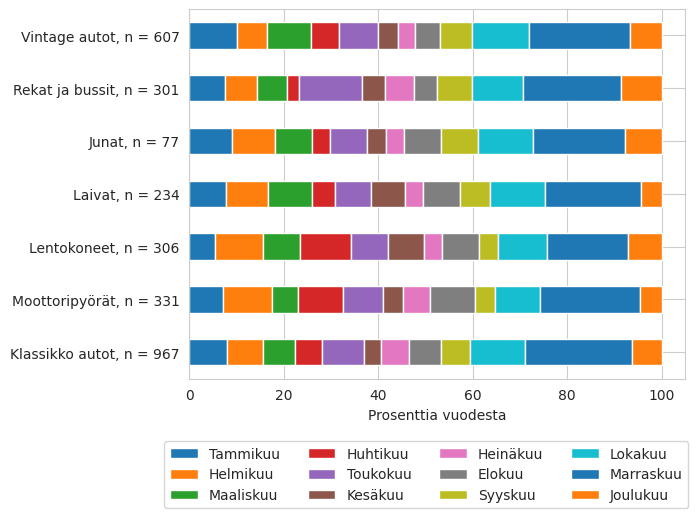

In [13]:
df4.T.plot.barh(stacked = True)
plt.xlabel('Prosenttia vuodesta')
plt.legend(loc=(-0.05, -0.35), ncol=4)

In [14]:
p = chi2_contingency(df3)[1]
print(f"p-arvo {p:.3f}")

p-arvo 0.007


**Khiin neliö-testi**

Kuukausien ja eri tuotantolinjojen välillä voidaan nähdä merkittävää
riippuvuutta, sillä p-arvo on 0.007 < 0.05.

Tätä voidaan esimerkiksi hyödyntää seuraavaan vuoden ennusteissa.

### **Tuotantolinjan myynnit kategorioissa**

In [15]:
df5 = df2.groupby("PRODUCTLINE")["SALES"].describe()
tunnusluvut = ["Lukumäärä", "Keskiarvo", "Keskihajonta", "Pienin", "Alaneljännes",
               "Mediaani", "yläneljännes", "Suurin"]
df5.index = koneet
df5.columns = tunnusluvut
from IPython.display import display, Markdown
display(Markdown(df5.to_markdown()))

|                 |   Lukumäärä |   Keskiarvo |   Keskihajonta |   Pienin |   Alaneljännes |   Mediaani |   yläneljännes |   Suurin |
|:----------------|------------:|------------:|---------------:|---------:|---------------:|-----------:|---------------:|---------:|
| Klassikko autot |         967 |     4053.38 |        2050.69 |   640.05 |        2494.19 |    3761.37 |        5325.08 | 12001    |
| Moottoripyörät  |         331 |     3523.83 |        1837.29 |   651.8  |        2203.29 |    3127.82 |        4351.19 | 11886.6  |
| Lentokoneet     |         306 |     3186.29 |        1519.54 |   875.91 |        2120.28 |    2841.81 |        3832.8  | 10066.6  |
| Laivat          |         234 |     3053.15 |        1073.71 |  1089.36 |        2261.4  |    2884.93 |        3531.92 |  6960.48 |
| Junat           |          77 |     2938.23 |        1456.6  |   972.4  |        2051.56 |    2445.6  |        3564.75 |  8977.05 |
| Rekat ja bussit |         301 |     3746.81 |        1671.72 |   482.13 |        2419.95 |    3449.4  |        4948.2  |  8844.12 |
| Vintage autot   |         607 |     3135.34 |        1787.57 |   541.14 |        1824.01 |    2795.27 |        3882.18 | 14082.8  |

([<matplotlib.axis.YTick at 0x798ce7469060>,
 [Text(0, 0, 'Klassikko autot, n = 967'),
  Text(0, 1, 'Moottoripyörät, n = 331'),
  Text(0, 2, 'Lentokoneet, n = 306'),
  Text(0, 3, 'Laivat, n = 234'),
  Text(0, 4, 'Junat, n = 77'),
  Text(0, 5, 'Rekat ja Bussit, n = 301'),
  Text(0, 6, 'Vintage autot, n = 607')])

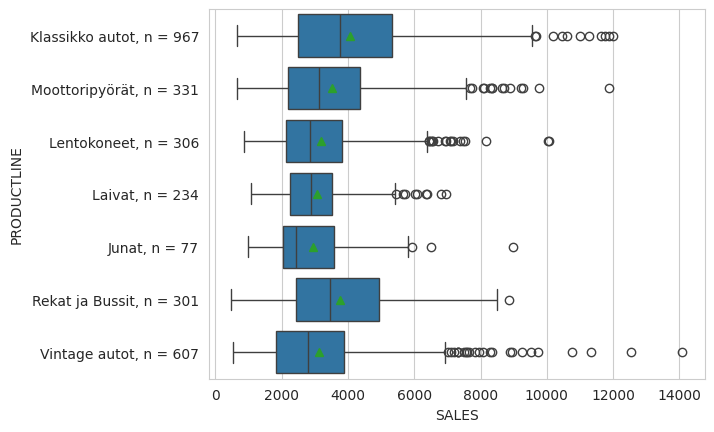

In [16]:
jarjestys = ["Classic Cars", "Motorcycles", "Planes", "Ships", "Trains", "Trucks and Buses", "Vintage Cars"]
sns.boxplot(data = df2, x = "SALES", y = "PRODUCTLINE", showmeans = True, order = jarjestys)


n_klassikkoautot = int(df5.iloc[0,0])
n_moottoripyorat = int(df5.iloc[1,0])
n_lentokoneet = int(df5.iloc[2,0])
n_laivat = int(df5.iloc[3,0])
n_junat = int(df5.iloc[4,0])
n_rekatjabussit = int(df5.iloc[5,0])
n_vintageautot = int(df5.iloc[6,0])

plt.yticks(ticks = [0,1,2,3,4,5,6], labels = [f"Klassikko autot, n = {n_klassikkoautot}",
                                    f"Moottoripyörät, n = {n_moottoripyorat}",
                                    f"Lentokoneet, n = {n_lentokoneet}",
                                    f"Laivat, n = {n_laivat}",
                                    f"Junat, n = {n_junat}",
                                    f"Rekat ja Bussit, n = {n_rekatjabussit}",
                                    f"Vintage autot, n = {n_vintageautot}"])


In [17]:
df_dropna = df2.dropna(subset = ["SALES"])

k1 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Classic Cars"]
k2 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Motorcycles"]
k3 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Planes"]
k4 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Ships"]
k5 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Trains"]
k6 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Trucks and Buses"]
k7 = df_dropna["SALES"][df_dropna["PRODUCTLINE"] == "Vintage Cars"]


from scipy.stats import f_oneway
f_oneway(k1,k2,k3,k4,k5,k6,k7)

F_onewayResult(statistic=25.225200006553216, pvalue=2.5768682553203986e-29)

In [18]:
p = f_oneway(k1,k2,k3,k4,k5,k6,k7)[1]
print(f"p-arvo {p:.3f}")


p-arvo 0.000


**Tuotantolinjojen myynnnit**

Tuotantolinjojen välillä on merkitseviä eroja myyntikeskiarvoissa. Tämä voidaan tunnistaa tarkastelemalla F-testin p-arvoa joka on < 0.001

### **Tuontantolinjan myynnit kuukausittain**

In [19]:
df6 = df2.groupby("MONTH_ID")["SALES"].describe()
tunnusluvut = ["Lukumäärä", "Keskiarvo", "Keskihajonta", "Pienin", "Alaneljännes",
               "Mediaani", "yläneljännes", "Suurin"]
df6.index = kuukaudet
df6.columns = tunnusluvut
from IPython.display import display, Markdown
display(Markdown(df6.to_markdown()))

|           |   Lukumäärä |   Keskiarvo |   Keskihajonta |   Pienin |   Alaneljännes |   Mediaani |   yläneljännes |   Suurin |
|:----------|------------:|------------:|---------------:|---------:|---------------:|-----------:|---------------:|---------:|
| Tammikuu  |         229 |     3431.77 |        1599.96 |   683.8  |        2297.05 |    3160.25 |        4223.13 |   9534.5 |
| Helmikuu  |         224 |     3618.04 |        1797.17 |   733.11 |        2252.57 |    3244.32 |        4553.52 |  10039.6 |
| Maaliskuu |         212 |     3558.97 |        1810.2  |   710.2  |        2189.01 |    3183.16 |        4721.46 |  10066.6 |
| Huhtikuu  |         178 |     3760.62 |        2402.47 |   541.14 |        2073.8  |    3057.81 |        5001.75 |  14082.8 |
| Toukokuu  |         252 |     3666.56 |        2058.26 |   482.13 |        2207.31 |    3166.55 |        4710.6  |  12001   |
| Kesäkuu   |         131 |     3471.43 |        1774.47 |   651.8  |        2155.88 |    3248.7  |        4174.33 |  11279.2 |
| Heinäkuu  |         141 |     3651.6  |        1786.15 |   717.4  |        2380    |    3204    |        4645.72 |   9169   |
| Elokuu    |         191 |     3451.89 |        1740.34 |   577.6  |        2149.61 |    3131.94 |        4344.57 |   9631   |
| Syyskuu   |         171 |     3419.44 |        1827.31 |   948.99 |        2090.57 |    2866.26 |        4406.36 |  10993.5 |
| Lokakuu   |         317 |     3536.96 |        1782.06 |   694.6  |        2204.1  |    3286.49 |        4556.16 |  11623.7 |
| Marraskuu |         597 |     3549.22 |        1800.26 |   703.6  |        2254.98 |    3167.36 |        4489.76 |  12536.5 |
| Joulukuu  |         180 |     3526    |        1730.97 |   728.4  |        2270.1  |    3210.1  |        4355.66 |   9720   |

Text(0.5, 0, '')

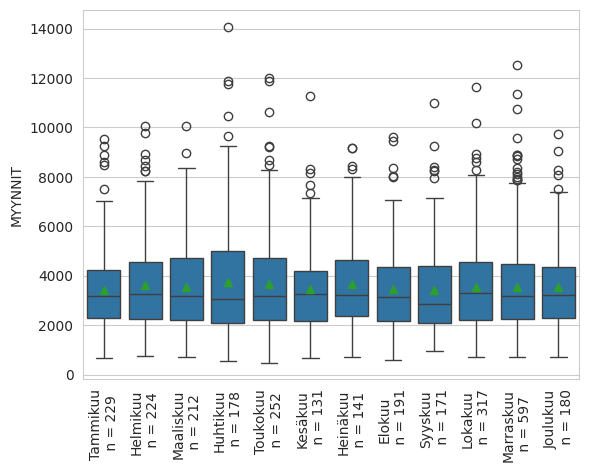

In [20]:
sns.boxplot(data = df2, x = "MONTH_ID", y = "SALES", showmeans = True)

n_kuukaudet = []

for i in range(12):
  n_kuukaudet.append(f"{kuukaudet[i]}\n n = {int(df6.iloc[i,0])}")

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11], labels = n_kuukaudet, rotation = 90)
plt.ylabel("MYYNNIT")
plt.xlabel("")

In [21]:
df_dropna = df2.dropna(subset = ["SALES"])

k1 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 1]
k2 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 2]
k3 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 3]
k4 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 4]
k5 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 5]
k6 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 6]
k7 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 7]
k8 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 8]
k9 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 9]
k10 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 10]
k11 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 11]
k12 = df_dropna["SALES"][df_dropna["MONTH_ID"] == 12]

f_oneway(k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12)

F_onewayResult(statistic=0.6075982821497143, pvalue=0.8238867449215848)

In [22]:
p = f_oneway(k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12)[1]
print(f"p-arvo {p:.3f}")

p-arvo 0.824


**Kuukausittain verrattuja myyntejä tuotantolinjoittain**


Kuukausien välillä ei ole merkitseviä eroja myyntien keskiarvoissa tuotantolinjoittain, sillä F-testin p-arvo on 0.824 > 0.05.